# Fundamental Questions

## Question 1 a) Solution:

A government bond is issued to support government spending. A bond can be issued to finance a new project or to fund day to day operations.
    
## Question 1 b) Solution:

In order to issue debt, the government must specify the dollar amount of the interest on that debt that must be paid back to the bond holder. This is called the coupon rate. When a government wants to issue a bond, the coupon rate of the bond needs to be the same as the current yield to maturity. This is because the bond needs to be sold at par value(the amount of the loan given to the government). Therefore the interest on a government loan will equal the yield to maturity(at that moment). The government ought to be concerned about the yield curve because this curve determines how much interest the government will have to pay on loans.

## Question 1 c) Solution:

The government can increase and decrease the money supply through the amount of bonds that the governmnent issues. For example if the government wishes to decrease money supply, then they can issue bonds and remove cash from the economny in exchange for bonds. If the government wishes to increase the money supply, then they can buy back bonds for cash.

## Question 2 Solution:

Firstly, I got rid of all the bonds with maturities that are farther then 5 years from now. Once I got rid of those bonds, I tried to choose my bonds so that the maturities were as close to 6 months apart as possible. After trying different combinations of the bonds I had left, I realized that the combination that produced the most bonds with maturities differing by 6 months included: CAN 1.25 Mar 25', 'CAN 1.5 Sep 24', 'CAN 2.25 Mar 24','CAN 1.75 Mar 23',CAN 0.5 Mar 22', 'CAN 0.75 Sep 21', 'CAN 0.75 Mar 21', 'CAN 0.75 Sep 20', 'CAN 1.5 Mar 20'. However In between 2023 to 2024 and between 2022 to 2023, the only bonds that were available were june bonds. So I chose bonds for each time period that had similar coupon rate to the rest of the bonds.

My final selection of bonds was: 
'CAN 1.25 Mar 25', 'CAN 1.5 Sep 24', 'CAN 2.25 Mar 24','CAN 1.5 Jun 23', 'CAN 1.75 Mar 23', 'CAN 2.75 Jun 22','CAN 0.5 Mar 22', 'CAN 0.75 Sep 21', 'CAN 0.75 Mar 21', 'CAN 0.75 Sep 20', 'CAN 1.5 Mar 20'
         
## Question 3 Solution:

In an intuitive sense, the eigenvectors of a covariance matrix represent the best lower dimensional representation of our stochastic random variables that lose the least information.
In a more rigouris sense, the eigenvectors of a covariance matrix represent the perpindicular directions along which a stochastic curve has the largest variance once projected onto the subspace created by eigenvectors. The corresponding eigenvalues orders these directions from largest variance(largest eigenvalue) to smallest(smallest eigenvalue).

# Empirical Questions

## Question 4 a) Solution:

Below I write the code that computes the yield(YTM) curve for each day. The first chunk of code is dedicated to all the helper functions that I used to do the computations on the data, the second is dedicated to computing the dirty price and plotting yield to maturity.

In [171]:
# HELPER FUNCTIONS

import pandas as pd
from scipy import optimize
import numpy as np
import datetime
from dateutil import relativedelta
import matplotlib.pyplot as plts

def time_months_difference(t1,t2)-> float:

    date2= datetime.date(int(t2.split('-')[2]), int(t2.split('-')[0]),int(t2.split('-')[1]))

    date1= datetime.date(int(t1.split('-')[2]), int(t1.split('-')[0]),int(t1.split('-')[1]))

    difference = relativedelta.relativedelta(date2, date1)

    years = difference.years
    months = difference.months
    days = difference.days
    
    #year_dif = abs(float(t2.split("-")[2]) - float(t1.split('-')[2]))
    #month_dif = abs(float(t2.split("-")[0]) - float(t1.split('-')[0]))
    #day_dif = abs(float(t2.split("-")[1]) - float(t1.split('-')[1])) 
    return 12*years+months+(1/30)*days

def dirty_price(current ,issue, clean_price, coupon) ->float:
    accrued_interest_time = time_months_difference(issue,current)%6
    accrued_interest = (coupon/2)*accrued_interest_time/6
    full_price = clean_price+ accrued_interest
    return full_price

def discounted_cash_flow_price_equation(r,coupon_semi,times_,actual_price) -> float:
    price = 0
    for i in range(0,len(times_)-1):
        price = price + coupon_semi/((1+r)**(times_[i]/12)) 
    price = price + (coupon_semi +100)/((1+r)**(times_[-1]/12)) 
    return price-actual_price
    
def cashflow_times(Date:str,Issue:str,dirty_price:str,Coupon:str,Maturity) -> list:
    accrued_interest_time = (time_months_difference(Issue,Date))%6
    time_to_next_payment = 6 - accrued_interest_time
    times = []
    times.append(time_to_next_payment)
    total_remaining_6_month_periods = (time_months_difference(Date,Maturity))//6
    time = time_to_next_payment
    for i in range(int(total_remaining_6_month_periods)):
        time = time + 6 
        times.append(time)
    return times

def yield_to_maturity(Date:str,Issue:str,dirty_price:str,Coupon:str,Maturity)->float:
    times = cashflow_times(Date,Issue,dirty_price,Coupon,Maturity)
    def cash_flow_eq(r)-> float:
        return discounted_cash_flow_price_equation(r,Coupon/2,times,dirty_price)
    return optimize.fsolve(cash_flow_eq ,0.015)[0]

In [172]:
import pandas as pd
import scipy as sp

bonds = pd.read_csv('C:\\Users\Christian\\Documents\\School_work\\4th Year Second Semester\\apm466\\Bond Prices()\\BondPrices.csv')
bonds = bonds.dropna(how='all', axis='columns')
dirty_price_lst = []
for i in range(0,bonds.shape[0]):
    dirty_price_lst.append(dirty_price(bonds.iloc[i]['Date'],bonds.iloc[i]['Issue'],bonds.iloc[i]['Close'],bonds.iloc[i]['Coupon']))

dirty_price(bonds.iloc[0]['Date'],bonds.iloc[0]['Issue'],bonds.iloc[0]['Close'],bonds.iloc[0]['Coupon'])    
bonds['Dirty Price Based on Closing'] = dirty_price_lst
bonds
yields = []
for i in range(0,bonds.shape[0]):
    yields.append(yield_to_maturity(bonds.iloc[i]['Date'],bonds.iloc[i]['Issue'],bonds.iloc[i]['Dirty Price Based on Closing'],
                                    bonds.iloc[i]['Coupon'],bonds.iloc[i]['Maturity']))
bonds['Calculated YTM'] = yields

10


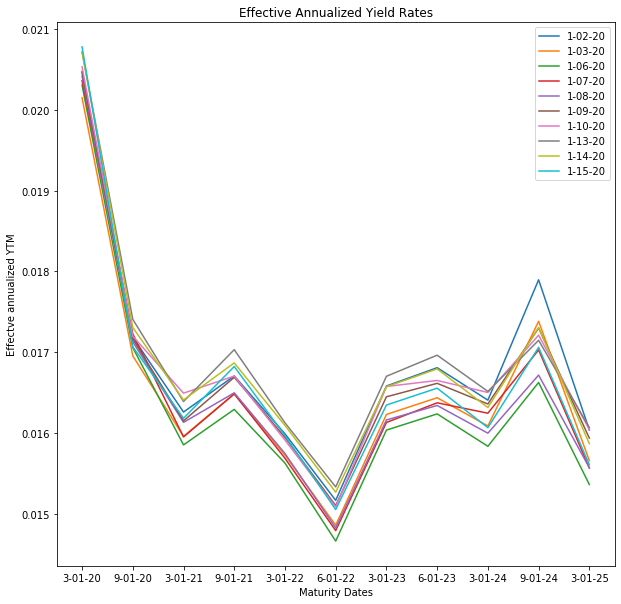

In [173]:
from itertools import chain 
names = ['CAN 1.25 Mar 25', 'CAN 1.5 Sep 24', 'CAN 2.25 Mar 24', 
         'CAN 1.5 Jun 23', 'CAN 1.75 Mar 23', 'CAN 2.75 Jun 22', 
         'CAN 0.5 Mar 22', 'CAN 0.75 Sep 21', 'CAN 0.75 Mar 21',
         'CAN 0.75 Sep 20', 'CAN 1.5 Mar 20']
bonds = bonds[bonds['Name'].isin(names)]
dates = ['1-0{}-20'.format(i) for i in [2,3,6,7,8,9]]
dates.extend(['1-{}-20'.format(i) for i in [10,13,14,15]])
print(len(dates))
plts.figure(figsize=(10,10))
for date in dates:
    daily = bonds[bonds['Date']==date]
    plts.plot(daily['Maturity'],daily['Calculated YTM'])
    plts.title('Effective Annualized Yield Rates')
    plts.xlabel('Maturity Dates')
    plts.ylabel('Effectve annualized YTM')
plts.legend(dates)
plts.show()

I decided to interpolate the points using lines. I could have used a higher degree interpolation technique, but I don't want to make assumptions about the curve shape in between points so I decided to use linear interpolation and keep in mind that this is an approximation. This is also the most computationally efficient interpolation method.

## Question 4 b) Solutions:

To compute the spot curve, I use the bootstrapping algorithm. I give a brief explanation of how to bootstrap a spot curve.


First I note that the CAN 1.5 Mar 2020 bond has no more remaining coupon payments left and as such can be considered as a zero coupon bond. I Then calculate the yield on that zero coupon bond by using the formula: $r(t) = \frac{-\ln(\frac{P}{N})}{t}$. The yield on that zero coupon bond is just a time $t$ spot rate. I use this first spot rate to calculate future spot rates. 

To compute a future spot rate, I then consider the bond with the next latest maturity: CAN 0.75 Sep 2020 and use this to calculate a 9 month spot rate. To do this I make the following argument; 

Note that the portfolio containing only a CAN 0.75 sep 2020 bond can be replicated using zero coupon bonds. ie) I can use the CAN 1.5 Mar 2020 bond and another 9 month zero coupon bond. After replicating cashflows, the prices of the two above portfolios are equal and we get the equation;

$P = P_1e^{-t_1r(t_1)}+P_2e^{-t_2r(t_2)}$ 

Where $P$ is the price of the CAN 0.75 Sep 2020 bond, $P_1$ is the replicated cashflow at 3 months, $P_2$ is the replicated cashflow at 9 months, $r(t_1)$ is the $t_1$ (2) month spot rate, $r(t_2)$ is the $t_2$ (9) month spot rate.

Note that all of the values in the above equation are known except for $r_2 $so I rearrange and solve for the 9 month spot rate:

$r(t_2) = \frac{-\log(\frac{P - P_1e^{-t_1r(t_1)}}{P_2})}{t_2}$

I do the same procedure for $r_3$ (15 month spot rate) using $r_2$, then after solving for $r_3,$, using $r_3$ to solve for $r_4$ (21 month spot rate) and so on. I can then plot the spot rates against time and interpolate between them and generate a spot curve. I can then do this for all 10 days that I have observed bond prices.

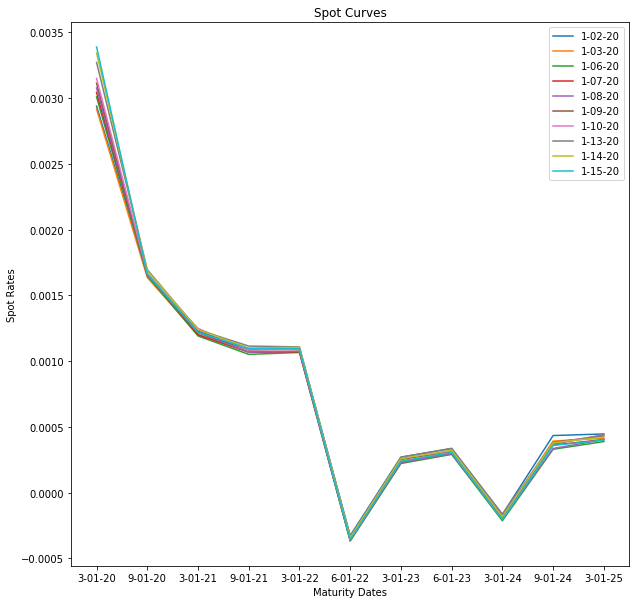

In [165]:
all_daily_yields_by_date = []
for j in range(0,len(dates)):
    daily_yields = []
    current_date = dates[j]
    daily_1 = pd.DataFrame(bonds[bonds['Date']==dates[j]])
    
    T = time_months_difference(current_date,daily_1.iloc[0]['Maturity'])
    p = daily_1.iloc[0]['Dirty Price Based on Closing'] 
    spot_1 = -(np.log(p/(100+daily_1.iloc[0]['Coupon']/2)))/T
    daily_yields.append(spot_1)
    
    for i in range(1, len(names)):
        T_2 = time_months_difference(current_date,daily_1.iloc[i]['Maturity'])
        T_1 = time_months_difference(current_date,daily_1.iloc[i-1]['Maturity']) 
        p_1 =daily_1.iloc[i]['Coupon']/2
        p_2 =daily_1.iloc[i]['Coupon']/2 + 100
        p = daily_1.iloc[i]['Dirty Price Based on Closing']
        r_1 = daily_yields[i-1]
        next_spot_rate = (-np.log((p-p_1*(np.e)**(-T_1*r_1))/p_2))/T_2
        daily_yields.append(next_spot_rate)
    all_daily_yields_by_date.append(daily_yields)
all_daily_yields_by_date

plts.figure(figsize=(10,10))
for daily_yields in all_daily_yields_by_date:
    plts.plot(daily_1['Maturity'],daily_yields)
plts.title('Spot Curves')
plts.xlabel('Maturity Dates')
plts.ylabel('Spot Rates')
plts.legend(dates)

## Question 4 c) Solutions:

I compute the forward rates iteratively, using the following formula;

if $\{r_t\}_{t\geq0}$ are spot rates then the forward rate from time t to time T ($T\geq t$) is given by;

$f_{t,T} = (\frac{(1+r_{T})^T}{(1+r_{t})^t})^{\frac{1}{(T-t)}} -1$

I then calculate $f_{1,2},f_{1,3},f_{1,4},f_{1,5}$ for each day and plot the days superimposed on-top of each other.

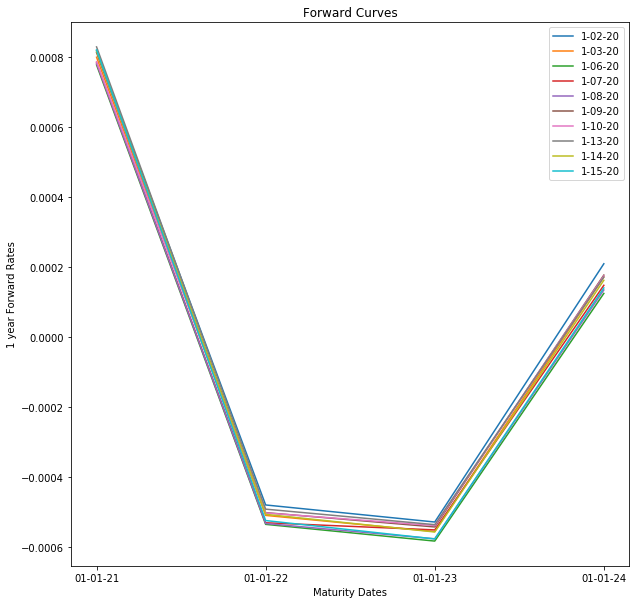

In [169]:
# I get the linear interpolated spot rates for each 
#year up to year 4.(I calculated the weightings by hand 
#because python was giving me too much trouble.)
all_yearly_yield_rates =[]
for daily_yields in all_daily_yields_by_date:
    yearly_yield_rates = []
    yearly_yield_rates.append(daily_yields[1]*(2/6) + (4/6)*daily_yields[2])
    yearly_yield_rates.append(daily_yields[3]*(2/6)+(4/6)*daily_yields[4])
    yearly_yield_rates.append(daily_yields[5]*(2/9)+(7/9)*daily_yields[6])
    yearly_yield_rates.append(daily_yields[7]*(2/9)+(7/9)*daily_yields[8])
    yearly_yield_rates.append(daily_yields[9]*(2/6)+(4/6)*daily_yields[10])
    all_yearly_yield_rates.append(yearly_yield_rates)
all_forward_rates = []
for one_yearly_yield_rates in all_yearly_yield_rates:
    one_year_forwards = []
    for i in range(1,len(one_yearly_yield_rates)):
        numerator = (1+one_yearly_yield_rates[i])**(i+1)
        denom = (1+one_yearly_yield_rates[0])
        one_year_forwards.append((numerator/denom)**(1/i) -1)
    all_forward_rates.append(one_year_forwards)

plts.figure(figsize=(10,10))
for forward_rates in all_forward_rates:
    plts.plot(['01-01-21','01-01-22','01-01-23','01-01-24'],
              forward_rates)
plts.title('Forward Curves')
plts.xlabel('Maturity Dates')
plts.ylabel('1 year Forward Rates')
plts.legend(dates)


### Some analysis on the results obtained:

Note that some of the forward rates and spot rates obtained are negative. This is probably due to inaccurate yield to maturity calculations. I used a root finder to solve for the roots of my present value function, However, I couldn't find a root solver online that gave more then one root and it is possible that the roots computed aren't actually the 'true yield to maturity'. For example in some of the 32 bonds; the calculated 'YTM' given by this root solver was negative. I don't have much experience in solving for roots numerically so I wasn't sure how to fix this and just left it. For question 5 I take absolute values of forward rates.

## Question 5 Solutions:

In [217]:
#Linearly interpolating the yield values:

all_interpolated_yield_rates = []
for date in dates:
    yearly_yield_rates = []
    daily_yields = bonds[bonds['Date']==date]['Calculated YTM']
    yearly_yield_rates.append(daily_yields.iloc[1]*(2/6) + (4/6)*daily_yields.iloc[2])
    yearly_yield_rates.append(daily_yields.iloc[3]*(2/6)+(4/6)*daily_yields.iloc[4])
    yearly_yield_rates.append(daily_yields.iloc[5]*(2/9)+(7/9)*daily_yields.iloc[6])
    yearly_yield_rates.append(daily_yields.iloc[7]*(2/9)+(7/9)*daily_yields.iloc[8])
    yearly_yield_rates.append(daily_yields.iloc[9]*(2/6)+(4/6)*daily_yields.iloc[10])
    all_interpolated_yield_rates.append(yearly_yield_rates)

    
    x_matrix_list = []
for date_index in range(0,len(all_interpolated_yield_rates)-1):
    jth_date_observe_vector = []
    for i_year_yield in range(0,len(all_interpolated_yield_rates[date_index])):
        x_ij = np.log(all_interpolated_yield_rates[date_index+1][i_year_yield]
                      /all_interpolated_yield_rates[date_index][i_year_yield])
        jth_date_observe_vector.append(x_ij)
    x_matrix_list.append(jth_date_observe_vector)
observation_list_matrix = np.array(x_matrix_list).T
cov_matrix_yields = np.asmatrix(np.cov(observation_list_matrix))

x_matrix_list = []
for date_index in range(0,len(all_forward_rates)-1):
    jth_date_observe_vector = []
    for i_year_yield in range(0,len(all_forward_rates[date_index])):
        x_ij = np.log(all_forward_rates[date_index+1][i_year_yield]
                      /all_forward_rates[date_index][i_year_yield])
        jth_date_observe_vector.append(x_ij)
    x_matrix_list.append(jth_date_observe_vector)
observation_list_matrix = np.array(x_matrix_list).T
cov_matrix_forwards = np.asmatrix(np.cov(observation_list_matrix))
print('The covarance matrix for the log returns of yield:')
print('')
print(cov_matrix_yields)
print(' ')
print('The covariance matrix for the log returns of forward rates:')
print('')
print(cov_matrix_forwards)
print()

The covarance matrix for the log returns of yield:

[[9.68341826e-05 5.44057376e-05 9.33724059e-05 1.02241020e-04
  1.08543296e-04]
 [5.44057376e-05 1.00142800e-04 1.18614827e-04 1.26627693e-04
  1.46006049e-04]
 [9.33724059e-05 1.18614827e-04 1.63165085e-04 1.81409467e-04
  2.10398328e-04]
 [1.02241020e-04 1.26627693e-04 1.81409467e-04 2.61257609e-04
  2.73840416e-04]
 [1.08543296e-04 1.46006049e-04 2.10398328e-04 2.73840416e-04
  3.32212343e-04]]
 
The covariance matrix for the log returns of forward rates:

[[ 0.00085219 -0.00082668 -0.00071374  0.00313238]
 [-0.00082668  0.00142592  0.0014056  -0.0060121 ]
 [-0.00071374  0.0014056   0.00195399 -0.00734143]
 [ 0.00313238 -0.0060121  -0.00734143  0.03253631]]



## Question 6 Solutions:

I calculate the eigenvectors and the eigenvalues for both matrices below below:

In [223]:
print('The eigenvalues of the covariance matrix for log returns of yield are:' )
print(' ')
print(np.linalg.eig(cov_matrix_yields)[0])
print('With corresponding eigenvectors;')
print(' ')
for i in range(0,len(np.linalg.eig(cov_matrix_yields)[1])):
    print(np.linalg.eig(cov_matrix_yields)[1][i])
print(' ')
print('The eigenvalues of the covariance matrix for log returns of yield are:' )
print('')
print(np.linalg.eig(cov_matrix_forwards)[0])
print('With corresponding eigenvectors;')
print(' ')
for i in range(0,len(np.linalg.eig(cov_matrix_forwards)[1])):
    print(np.linalg.eig(cov_matrix_forwards)[1][i])

The eigenvalues of the covariance matrix for log returns of yield are:
 
[8.33242055e-04 5.81441183e-05 3.96861563e-05 2.67328018e-06
 1.98664101e-05]
With corresponding eigenvectors;
 
[[ 0.2418284   0.85814176 -0.34898451 -0.26430471  0.11603696]]
[[ 0.30243522  0.07720806  0.74003774 -0.55012399 -0.2286473 ]]
[[0.42617737 0.26632629 0.38995329 0.76877189 0.06610127]]
[[ 0.5394614  -0.20555574 -0.39458807  0.03370355 -0.71406761]]
[[ 0.61433395 -0.38006418 -0.15096568 -0.1880438   0.64806936]]
 
The eigenvalues of the covariance matrix for log returns of yield are:

[0.03564631 0.00068492 0.00014831 0.00028889]
With corresponding eigenvectors;
 
[[-0.09467348  0.84411599 -0.50453956  0.15474157]]
[[ 0.1789728  -0.50498749 -0.82853569  0.16274207]]
[[ 0.21752456 -0.00727139  0.23737598  0.94672216]]
[[-0.95482393 -0.1800082  -0.0511966   0.23084025]]


The largest eigenvalue is the maximal variance of the data after the data has been projected onto the corresponding normalized eigenvector. This suggests that the shape of the yield/forward curve defined by projecting the random variables onto the largest eigenvector explains the most variance comparitively to the other eigenvectors. 

The link to the github with the references and code is:
''

This document was done in jupyterlab so the attatched ipynb will be available through the github link.